/Users/gedena/miniconda3/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
2023-03-03 21:55:06.497224: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-03-03 21:55:06.497367: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Metal device set to: Apple M2

systemMemory: 8.00 GB
maxCacheSize: 2.67 GB

Epoch 1/5
   1/1875 [..............................] - ETA: 5:55 - loss: 2.2391 - accuracy: 0.2500

2023-03-03 21:55:06.784289: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2023-03-03 21:55:06.908287: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1861/1875 [============================>.] - ETA: 0s - loss: 0.4712 - accuracy: 0.8764

2023-03-03 21:55:13.414615: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1875/1875 [==============================] - 7s 4ms/step - loss: 0.4700 - accuracy: 0.8766 - val_loss: 0.3115 - val_accuracy: 0.9143
Epoch 2/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3040 - accuracy: 0.9148 - val_loss: 0.2836 - val_accuracy: 0.9213
Epoch 3/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2836 - accuracy: 0.9207 - val_loss: 0.2704 - val_accuracy: 0.9244
Epoch 4/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2736 - accuracy: 0.9233 - val_loss: 0.2694 - val_accuracy: 0.9250
Epoch 5/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2669 - accuracy: 0.9261 - val_loss: 0.2664 - val_accuracy: 0.9261
Time taken: 35.71749305725098 seconds


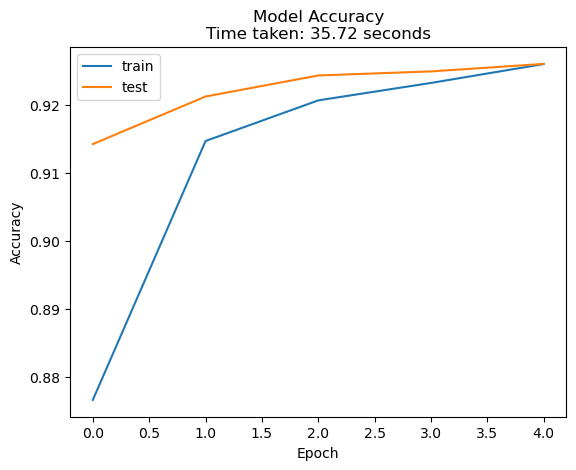

In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
import time
import matplotlib.pyplot as plt

# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize the data
x_train = x_train / 255.0
x_test = x_test / 255.0

# Define the model
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model and record the time taken
start_time = time.time()
history = model.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test), batch_size=32)
end_time = time.time()
print("Time taken:", end_time - start_time, "seconds")

# Plot the accuracy graph with time taken
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy\nTime taken: {:.2f} seconds'.format(end_time - start_time))
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
